# Metabolite Figures

In this jupyter notebook, I will create a 4 boxplot graphs, each showing the terminal level of 1 metabolite among the 4 diet groups. The colors will be gray for the Control rats and red for the HFHS rats. Rats on a TRF diet will have dashed lines. The 4 metabolites will be: 
1. Adiponectin
2. Leptin
3. Triglyceride

4. Liver Weight  <font color=red>Replaced Cholesterol </font> 

In [1]:
#----------------------------------------------------------
# Import important libraries
#----------------------------------------------------------
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp
sns.set()

#Set the background and size of the figure
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black', 'font.family': 'Arial'})
my_pal = {"Control Ad Lib": "gray", "HFHS Ad Lib": "red", "Control Restricted": "white", "HFHS Restricted": "white"}
plt.rcParams['hatch.linewidth'] = 3
plt.rcParams['figure.dpi'] = 1000

## Creating Boxplot Figures

In [2]:
#----------------------------------------------------------
# Collect all the relevant data from the .xlxs file into one 'master_data' dataframe
#----------------------------------------------------------
master_data_location = 'https://www.dropbox.com/s/eu0szifsb9yimo3/2018VT_termination_data_master_document.csv?dl=1'
master_data = pd.read_csv(master_data_location)
master_data['group']=master_data.diet+' '+master_data.feeding_schedule
master_data = master_data.set_index('group')
master_data['diet-schedule']=master_data.diet+' '+master_data.feeding_schedule
master_data = master_data.rename(columns={" Leptin": "Leptin", "triglyceride (mg/mL)": "Triglyceride"}, index = {"control ad lib": "Control Ad Lib", "control restriction": "Control Restricted", "HFHS ad lib": "HFHS Ad Lib", "HFHS restriction": "HFHS Restricted"})

#----------------------------------------------------------
# Collect all the relevant data from the .xlxs file into one 'master_data' dataframe
#----------------------------------------------------------
anova_data = pd.read_csv(master_data_location, index_col=0)
anova_data = anova_data.rename(columns={" Leptin": "Leptin", "triglyceride (mg/mL)": "Triglyceride"})
anova_data['diet_and_schedule'] = anova_data["diet"].astype(str) +" "+ anova_data["feeding_schedule"].astype(str)
anova_data.head()

,diet,feeding_schedule,liver_weight,total_abdominal_fat,total_gonadal_fat,total_fat_pad,final_BW,Leptin,Cholesterol,Triglyceride,GSP (umol/L),Adiponectin,diet_and_schedule
Rat,,,,,,,,,,,,,
1,control,ad lib,17.2,4.6,3.9,8.5,380,1.637628,82.053143,0.942691,112.240742,4.988413,control ad lib
2,control,ad lib,14.0,5.4,3.4,8.8,318,2.032943,103.345415,1.254153,121.759269,4.256736,control ad lib
3,control,ad lib,13.6,5.5,3.5,9.0,351,1.555637,55.869566,0.228261,144.648151,6.666516,control ad lib
4,control,ad lib,14.5,5.2,4.7,9.9,357,2.997072,96.807567,0.407609,155.222252,3.853354,control ad lib
5,control,ad lib,13.5,7.4,5.6,13.0,363,2.704246,81.771341,0.619565,221.916665,4.382227,control ad lib


## Download parmeters for plotting each group

In [3]:
plot_data_location = "https://www.dropbox.com/s/djpbvky0mwxpups/plotting_by_group.csv?dl=1"
plot_parameters = pd.read_csv(plot_data_location, index_col=0)
plot_parameters

,color,marker,line_type,hatches,hatch_colors,fill_color,label
group,,,,,,,
control ad lib,grey,o,-,,grey,grey,CA
control restriction,grey,v,--,/,grey,white,CR
HFHS ad lib,red,o,-,,red,red,HA
HFHS restriction,red,v,--,/,red,white,HR


# Panel for Metabolites

## Make a custom legend on the right of the plot

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def make_legend():
    a_val = 0.6
    colors = ['gray','gray','red','red']

    circ1 = mpatches.Patch( facecolor=colors[0],hatch='',label='Cont\nAL')
    circ2 = mpatches.Patch( facecolor=colors[1],hatch='//',label='Cont\nRes')
    circ3 = mpatches.Patch(facecolor=colors[2],hatch='',label='HFHS\nAL')
    circ4 = mpatches.Patch(facecolor=colors[3],hatch='//',label='HFHS\nRes')

    plt.legend(handles = [circ1,circ2,circ3, circ4],loc=0, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    return()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


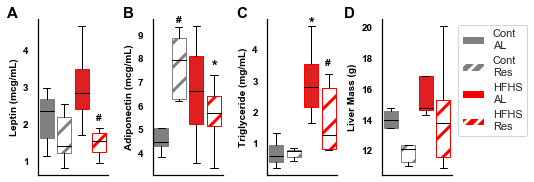

In [7]:
#----------------------------------------------------------
# Method to Create Panel of Metabolites
#----------------------------------------------------------
def making_panel(metabolite, unit, name):
    #Set the size, dashed lines, and colors for the figure
    #ax1 = sns.swarmplot(x=master_data.index, y=metabolite, color='black', size=2)
    ax = sns.boxplot(x=master_data.index, y=metabolite, color='white', linewidth=1, palette=plot_parameters.fill_color, showfliers = False)
    hatches = ["", "///", "", "///"]
    colors = ["black", "gray", "black", "red"]
    for i, hatch, patch in zip(plot_parameters.hatch_colors, plot_parameters.hatches, ax.artists):
        patch.set_hatch(hatch)
        patch.set_edgecolor(i)

    # Add x- and y-labels, ticks, and units
    plt.ylabel(name + ' (' + unit + ')', fontsize=10, fontweight = "bold", color = "black")
    plt.xlabel('')
    #plt.xticks(range(len(plot_parameters.index)), plot_parameters.label, fontweight = 'bold', fontsize=10, color = "black")
    ax.tick_params(labelbottom=False) 
    plt.yticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.setp(ax.lines, color="black")

    # Clean up and save the figure
    sns.despine()
    plt.tight_layout()

plt.figure(figsize = (7.48, 2.5))

# LIVER WEIGHT
plt.subplot(1, 4, 4)
making_panel(master_data.liver_weight, "g", "Liver Mass")
#plt.annotate('*', (1.85, 65), fontsize=15, color = 'black', fontweight='bold')
#plt.annotate('*', (2.85, 48), fontsize=15, color = 'black', fontweight='bold')
plt.figtext(0.64, 0.93, "D", fontsize = 15, color = "black", fontweight = "bold")


# TRIGLYCERIDE
plt.subplot(1, 4, 3)
making_panel(master_data.Triglyceride, "mg/mL", "Triglyceride")
plt.annotate('*', (1.85, 4.7), fontsize=15, color = 'black', fontweight='bold')
#plt.annotate('*', (2.85, 3.3), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('#', (2.8, 3.5), fontsize=10, color = 'black', fontweight='bold')
plt.figtext(0.44, 0.93, "C", fontsize = 15, color = "black", fontweight = "bold")

# ADIPONECTIN
plt.subplot(1, 4, 2)
making_panel(master_data.Adiponectin, "mcg/mL", "Adiponectin")
plt.annotate('#', (0.8, 9.5), fontsize=10, color = 'black', fontweight='bold')
#plt.annotate('*', (1.85, 9.5), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (2.85, 7.5), fontsize=15, color = 'black', fontweight='bold')
plt.figtext(0.23, 0.93, "B", fontsize = 15, color = "black", fontweight = "bold")

# LEPTIN
plt.subplot(1, 4, 1)
making_panel(master_data.Leptin, "mcg/mL", "Leptin")
plt.annotate('#', (2.8, 2.1), fontsize=10, color = 'black', fontweight='bold')
plt.figtext(0.015, 0.93, "A", fontsize = 15, color = "black", fontweight = "bold")

plt.subplot(1, 4, 4)
make_legend()

plt.savefig("Metabolite Panel.tif", dpi = 1000)
plt.show()

# Optional: Normalized Liver Mass

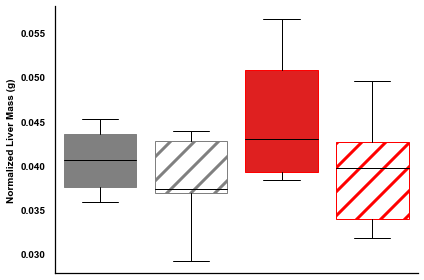

In [6]:
# LIVER WEIGHT
making_panel((master_data.liver_weight)/(master_data.final_BW), "g", "Normalized Liver Mass")
#plt.annotate('*', (1.85, 65), fontsize=15, color = 'black', fontweight='bold')
#plt.annotate('*', (2.85, 48), fontsize=15, color = 'black', fontweight='bold')
#plt.figtext(0.64, 0.93, "D", fontsize = 15, color = "black", fontweight = "bold")
